# Machine Learning - EX2

In [179]:
# Import 
from LinearRegression import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Linear Regression

### On synthetic data

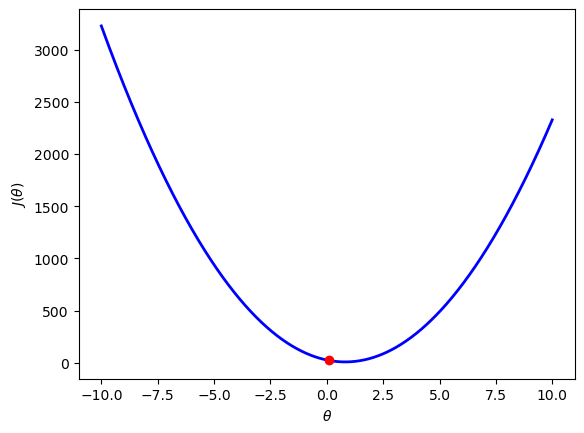

In [180]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

#print("X:", X)
#print("y:", y)

model = LinearRegression(alpha=0.01, num_iters=1000)

# Training the model
model.fit(X, y)

# Making predictions
#predictions = model.predict(X)

print("optimized parameter (theta):", model.theta)

### PLot the curve of cost function

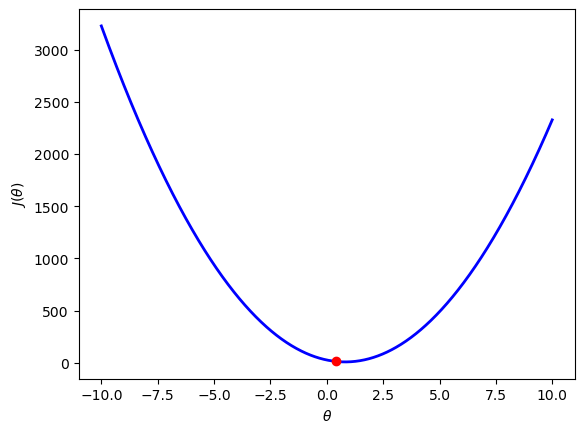

In [150]:

model.plot_gradient_descent(X, y)

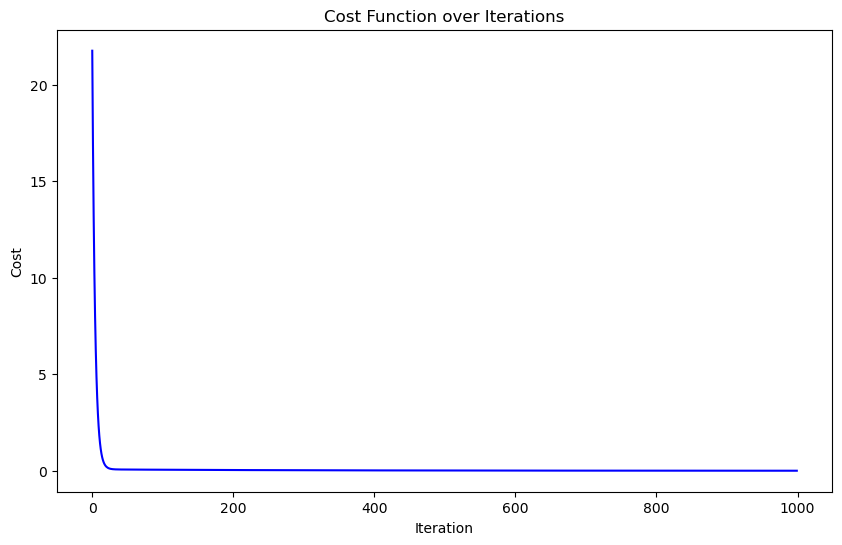

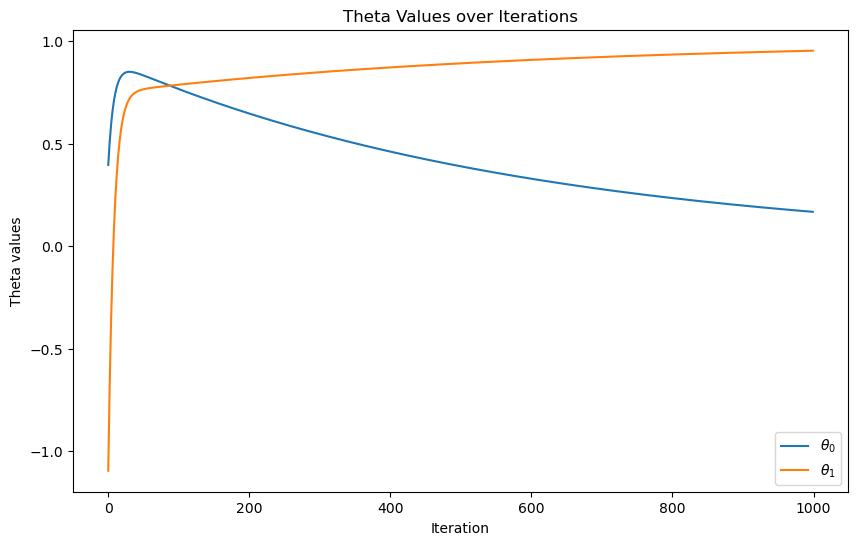

In [151]:
def plot_cost_parameter(model, theta_indices=None, print_legend=True, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.plot(range(model.num_iters), model.cost_history, 'b-')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function over Iterations')
    plt.show()

    # Plot all if not specified
    if theta_indices is None:
        theta_indices = range(model.theta_history.shape[1])

    plt.figure(figsize=figsize)
    for i in theta_indices:
        plt.plot(range(model.num_iters), model.theta_history[:, i], label=f'$\\theta_{i}$')
    
    plt.xlabel('Iteration')
    plt.ylabel('Theta values')
    if print_legend:
        plt.legend()
    plt.title('Theta Values over Iterations')
    plt.show()


plot_cost_parameter(model)


### Crime and communities data set

In [152]:
# Load and transfrom the data into a pandas DataFrame
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 
  
# as pandas dataframes) 
X = communities_and_crime.data.features 
y = communities_and_crime.data.targets 


X = pd.DataFrame(X, columns=communities_and_crime.feature_names)
y = pd.DataFrame(y, columns=communities_and_crime.target_names)

# Concatenate X and y 
full_df = pd.concat([X, y], axis=1)

# export the data

### Preprocessing

In [153]:
# drop columns if they have more then 50% missing values
# Replace '?' with NaN
full_df = full_df.replace('?', np.nan)

missing_percentage = full_df.isnull().mean() * 100
#
columns_to_drop = missing_percentage[missing_percentage > 50].index
full_df = full_df.drop(columns=columns_to_drop)

# Check the shape of the cleaned dataframe
print(full_df.shape)

# Drop the column communityname -> encoding the column would result in too many columns
full_df = full_df.drop(columns=['communityname'])

# Impute missing values with the median value
full_df = full_df.fillna(full_df.median())

# Check if there are any missing values
print(full_df.isnull().sum().sum())
display(full_df)


(1994, 104)
0


,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,6,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,9,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,25,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [154]:
# make sure that all columns are numeric
full_df = full_df.apply(pd.to_numeric, errors='coerce')

### Split the data

In [155]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = full_df.drop(columns=['ViolentCrimesPerPop'])
y = full_df['ViolentCrimesPerPop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train the data

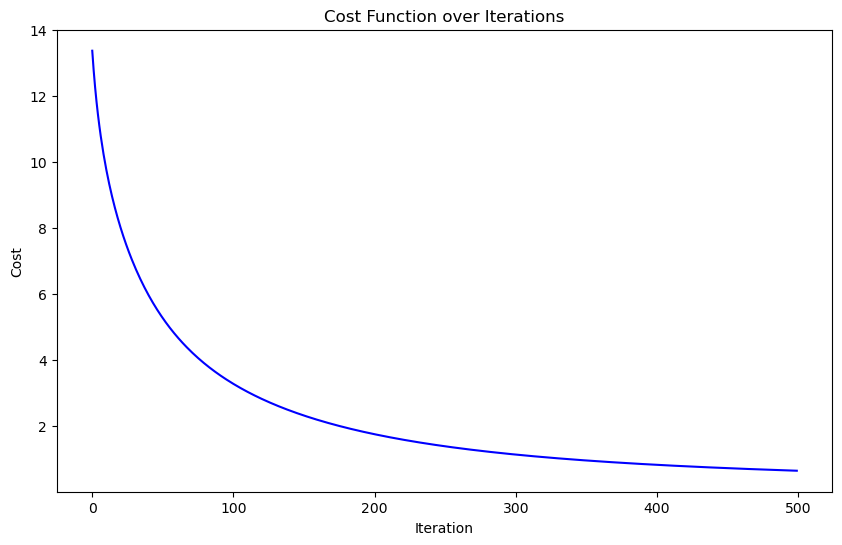

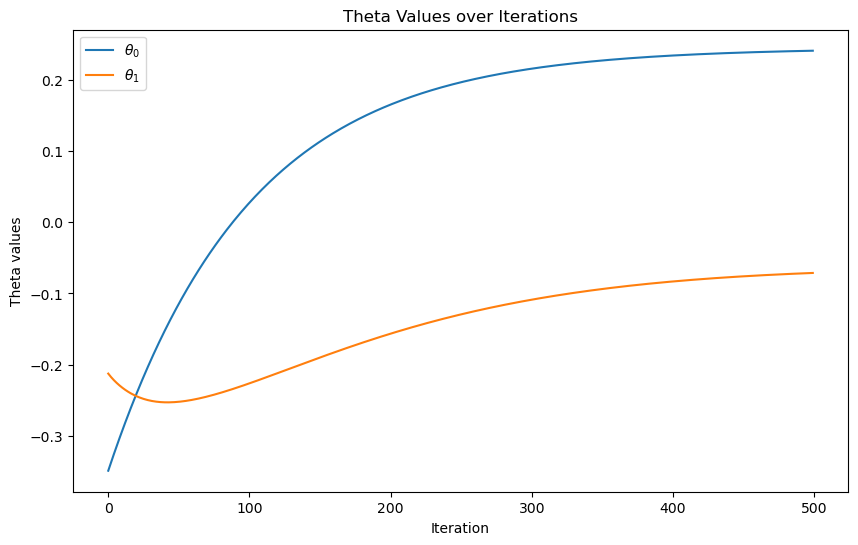

In [157]:
from LinearRegression import LinearRegression

model2 = LinearRegression(alpha=0.01, num_iters=500)
model2.fit(X_train, y_train)

# PLot the costs and parameters
plot_cost_parameter(model2, theta_indices=[0, 1])

In [158]:
model3 = LinearRegression(alpha=0.01, num_iters=100000)
model3.fit(X_train, y_train)


### Plot coefficients

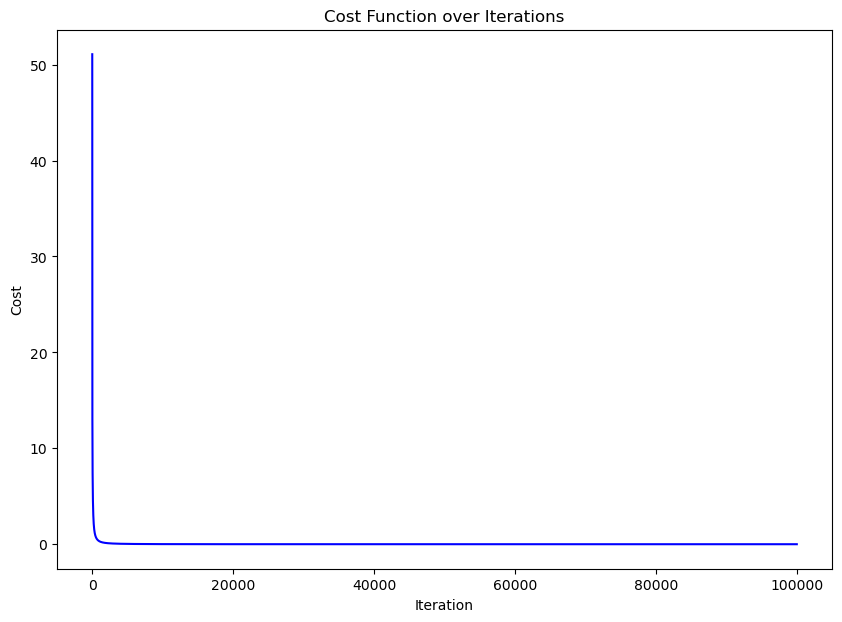

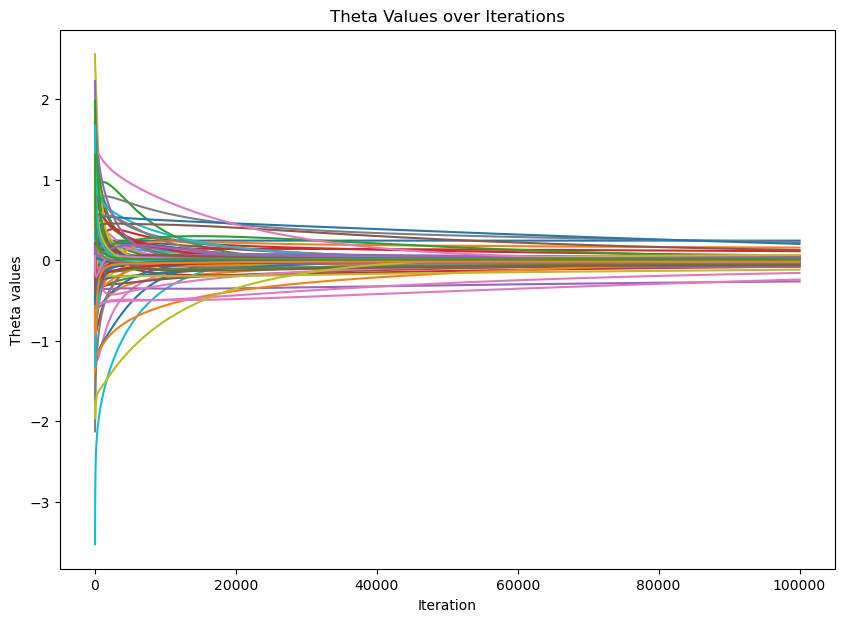

In [159]:

# PLot the costs and parameters
plot_cost_parameter(model3, figsize=(10, 7), print_legend=False)


### Make predictions and compare with sklearn

In [160]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


### Predict and evaluate own Linear Regression

In [161]:
model3.predict(X_test)

# RMSE
y_pred = model3.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE of own implementation
print(f"RMSE of own implementation: {rmse}")

# Calculate R squared

r2 = r2_score(y_test, y_pred)

# Print the R squared of own implementation
print(f"R squared of own implementation: {r2}")

RMSE of own implementation: 0.13296709378536092
R squared of own implementation: 0.6308597489500996


#### Linear Regression from sklearn

In [162]:
# Linear regression with sklearn on the same data 
from sklearn.linear_model import LinearRegression


model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

# Make predictions
y_pred = model_sk.predict(X_test)

# Evaluate the model
mse_sk = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse_sk)

print("Root Mean Squared Error with sklearn:", rmse)

# R squared
r2 = r2_score(y_test, y_pred)

print("R squared with sklearn:", r2)

Root Mean Squared Error with sklearn: 0.13136553973073428
R squared with sklearn: 0.6396985922399925


#### Compare Coefficients

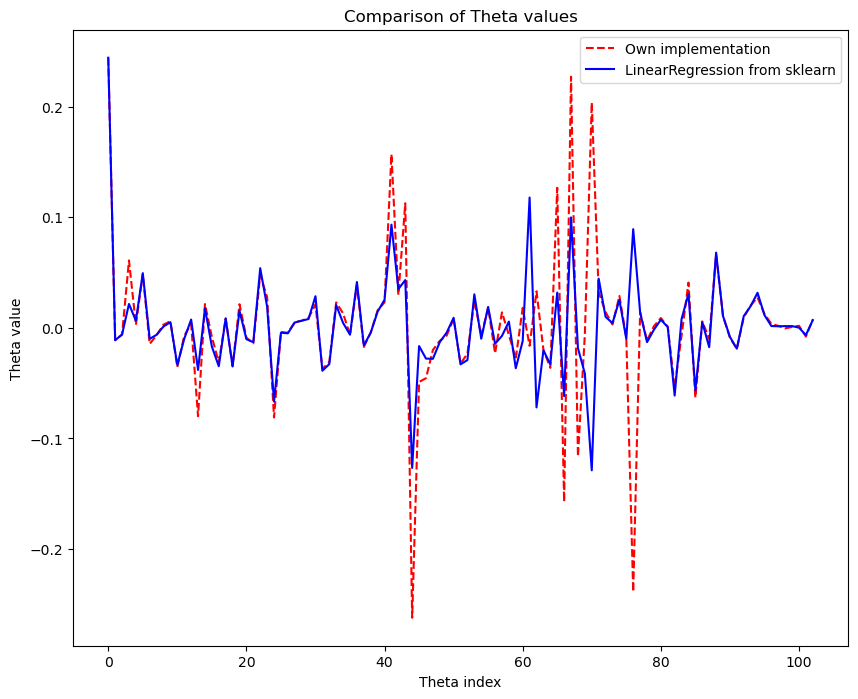

In [175]:
# Extract tetha values from own implementation
theta = model3.theta

# Extract theta values from sklearn
coef_sk = model_sk.coef_
intercept_sk = model_sk.intercept_

theta_sk = np.concatenate([[intercept_sk], coef_sk])

# Compare the two thetas in a bar chart



plt.figure(figsize=(10, 8))
plt.plot(theta, 'r--', label='Own implementation')
plt.plot(theta_sk, 'b-', label='LinearRegression from sklearn')
plt.xlabel('Theta index')
plt.ylabel('Theta value')
plt.legend()
plt.title('Comparison of Theta values')
plt.show()


#### SGDRegressor

In [164]:
# Compare performance with SGD from sklearn
from sklearn.linear_model import SGDRegressor

model_sgd = SGDRegressor(max_iter=100000, alpha=0.01)
model_sgd.fit(X_train, y_train)

# Make predictions
y_pred = model_sgd.predict(X_test)

# Evaluate the model by RMSE
mse_sgd = mean_squared_error(y_test, y_pred)
RMSE_sgd = np.sqrt(mse_sgd)

print("Root Mean Squared Error with SGD:", RMSE_sgd)

# Compute R2 score
r2_sgd = r2_score(y_test, y_pred)

print("R squared with SGD:", r2_sgd)


Root Mean Squared Error with SGD: 0.1354421147492224
R squared with SGD: 0.6169896569021023


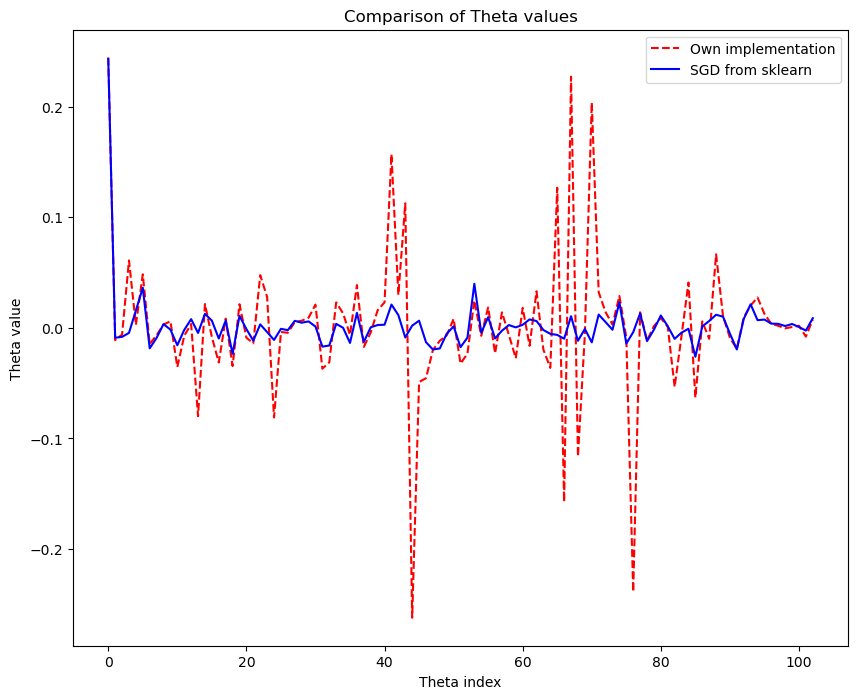

Own implementation: [[ 0.2444326 ]
 [-0.01097793]
 [-0.00602973]
 [ 0.06106815]
 [ 0.00280725]
 [ 0.04851537]
 [-0.01451072]
 [-0.00655777]
 [ 0.0029851 ]
 [ 0.00606696]
 [-0.03537965]
 [-0.00710105]
 [ 0.00351297]
 [-0.07985476]
 [ 0.02158602]
 [-0.00814388]
 [-0.03129464]
 [ 0.00837051]
 [-0.03449882]
 [ 0.02143027]
 [-0.00886398]
 [-0.01393932]
 [ 0.04771372]
 [ 0.0279821 ]
 [-0.08103755]
 [-0.00365938]
 [-0.00440405]
 [ 0.00526504]
 [ 0.00651124]
 [ 0.00922744]
 [ 0.02108581]
 [-0.03692098]
 [-0.03112567]
 [ 0.02306271]
 [ 0.0131387 ]
 [-0.00639905]
 [ 0.03875612]
 [-0.01718845]
 [-0.00411677]
 [ 0.0160088 ]
 [ 0.02315063]
 [ 0.15716198]
 [ 0.02989792]
 [ 0.11276712]
 [-0.26216425]
 [-0.04893425]
 [-0.04546937]
 [-0.01993727]
 [-0.01165897]
 [-0.00681851]
 [ 0.00827528]
 [-0.03227465]
 [-0.02328154]
 [ 0.02473006]
 [-0.00714142]
 [ 0.01857088]
 [-0.02292396]
 [ 0.01408364]
 [-0.00626837]
 [-0.02748128]
 [ 0.01812702]
 [-0.01616218]
 [ 0.03311022]
 [-0.01969258]
 [-0.0361599 ]
 [ 0.

In [176]:
# Compare Coefficients  of own implementation and SGD
coef_SGD = model_sgd.coef_
intercept_SGD = model_sgd.intercept_

intercept_SGD = intercept_SGD.ravel()

# Intercept zu Beginn der Koeffizienten hinzufügen
theta_sgd = np.concatenate((intercept_SGD, coef_SGD))

# Compare the two thetas in a bar chart
plt.figure(figsize=(10, 8))
plt.plot(theta, 'r--', label='Own implementation')
plt.plot(theta_sgd, 'b-', label='SGD from sklearn')
plt.xlabel('Theta index')
plt.ylabel('Theta value')
plt.legend()
plt.title('Comparison of Theta values')
plt.show()


print("Own implementation:", theta)
print("SGD:", theta_sgd)

# lenth of list theta_sgd
print(len(theta_sgd))

# length of list theta
print(len(theta))

#### SVR 


In [166]:
# SVR with sklearn
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train, y_train)

# Make predictions
y_pred = model_svr.predict(X_test)

# Evaluate the model by RMSE
mse_svr = mean_squared_error(y_test, y_pred)
RMSE_svr = np.sqrt(mse_svr)

print("Root Mean Squared Error with SVR:", RMSE_svr)

# Compute R2 score
r2_svr = r2_score(y_test, y_pred)

print("R squared with SVR:", r2_svr)

Root Mean Squared Error with SVR: 0.14749425175778375
R squared with SVR: 0.545793609746549


### Random Forest

In [167]:
# Random Forest with sklearn
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model by RMSE
mse_rf = mean_squared_error(y_test, y_pred)
RMSE_rf = np.sqrt(mse_rf)

print("Root Mean Squared Error with Random Forest:", RMSE_rf)

# Compute R2 score
r2_rf = r2_score(y_test, y_pred)

print("R squared with Random Forest:", r2_rf)


Root Mean Squared Error with Random Forest: 0.13524507477400635
R squared with Random Forest: 0.6181032463246016


## KNN

In [168]:
# Import knn regressor
from knn import knnRegressor


### On synthetic data

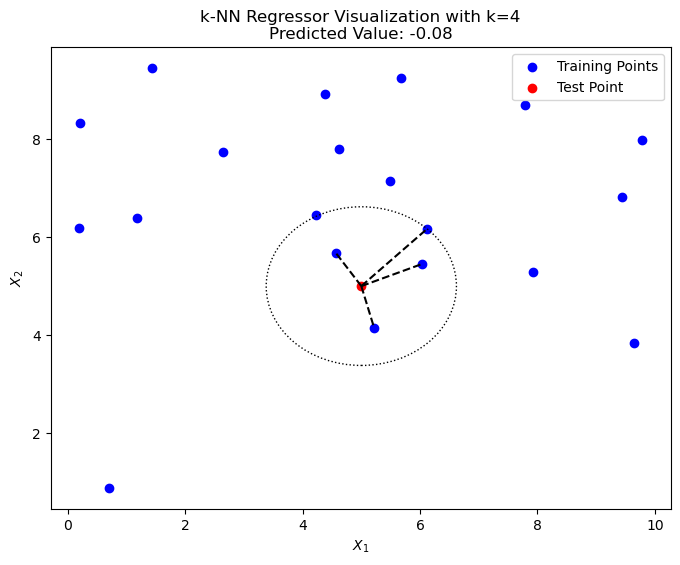

In [188]:
## Generate synthetic data
np.random.seed(0)
X_train = np.random.rand(20, 2) * 10
y_train = np.sin(X_train[:, 0]) + np.cos(X_train[:, 1])
test_point = np.array([5, 5])

knn = knnRegressor(k=4)
knn.fit(X_train, y_train)


def plot_knn_regressor(knn=knn, X_train=X_train, y_train = X_train, test_point = test_point, figsize=(8, 6)):

    # Predict the value of the test point
    predicted_value = knn.predict([test_point])[0]

    # Plotting the data and the test point with k-nearest neighbors
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label='Training Points')
    plt.scatter(test_point[0], test_point[1], color='red', label='Test Point')

    # Plot the k-nearest neighbors
    distances = [np.linalg.norm(test_point - x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:knn.k]
    for i in k_indices:
        plt.plot([test_point[0], X_train[i][0]], [test_point[1], X_train[i][1]], 'k--')

    # Draw circles 
    circle1 = plt.Circle(test_point, np.sort(distances)[knn.k-1], color='black', fill=False, linestyle='dotted')
    plt.gca().add_artist(circle1)

    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.legend()
    plt.title(f'k-NN Regressor Visualization with k={knn.k}\nPredicted Value: {predicted_value:.2f}')
    plt.show()


plot_knn_regressor()

In [169]:
X = full_df.drop(columns=['ViolentCrimesPerPop']).to_numpy()
y = full_df['ViolentCrimesPerPop'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
knn = knnRegressor(k=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [171]:
# RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

# R squared
r2 = r2_score(y_test, y_pred)

print("R squared:", r2)

Root Mean Squared Error (RMSE): 0.16014983585633807
R squared: 0.4645042286144506


### KNN from sklearn

In [172]:
# KNN with sklearn
from sklearn.neighbors import KNeighborsRegressor

knn_sk = KNeighborsRegressor(n_neighbors=5)
knn_sk.fit(X_train, y_train)

y_pred_sk = knn_sk.predict(X_test)

# RMSE
mse = mean_squared_error(y_test, y_pred_sk)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) with sklearn:", rmse)

# R squared
r2 = r2_score(y_test, y_pred_sk)
print("R squared with sklearn:", r2)


Root Mean Squared Error (RMSE) with sklearn: 0.16014983585633807
R squared with sklearn: 0.4645042286144506
